In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numbers import Number

In [2]:
titanic=pd.read_csv(r'C:\Users\denni\Desktop\data_vault_2021\Classification\train.csv')

In [3]:
print(titanic.shape)
titanic.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_survive=titanic['Survived']
titanic_survive.sum()

342

In [6]:
titanic_non_survive=891-titanic_survive.sum()
titanic_non_survive

549

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025667BA4C88>]],
      dtype=object)

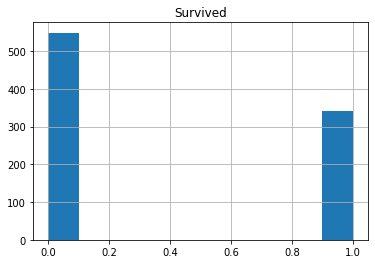

In [7]:
titanic_survive= titanic[['Survived']]
titanic_survive.hist()

In [8]:
titanic_1st= titanic[['Survived','Pclass']]
titanic_1st.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [9]:
var_1=titanic_1st[titanic_1st['Pclass']==1].sum()
var_2=titanic_1st[(titanic_1st['Pclass']==1) & (titanic_1st['Survived']==1)].sum()
print(var_1)
print(var_2)

Survived    136
Pclass      216
dtype: int64
Survived    136
Pclass      136
dtype: int64


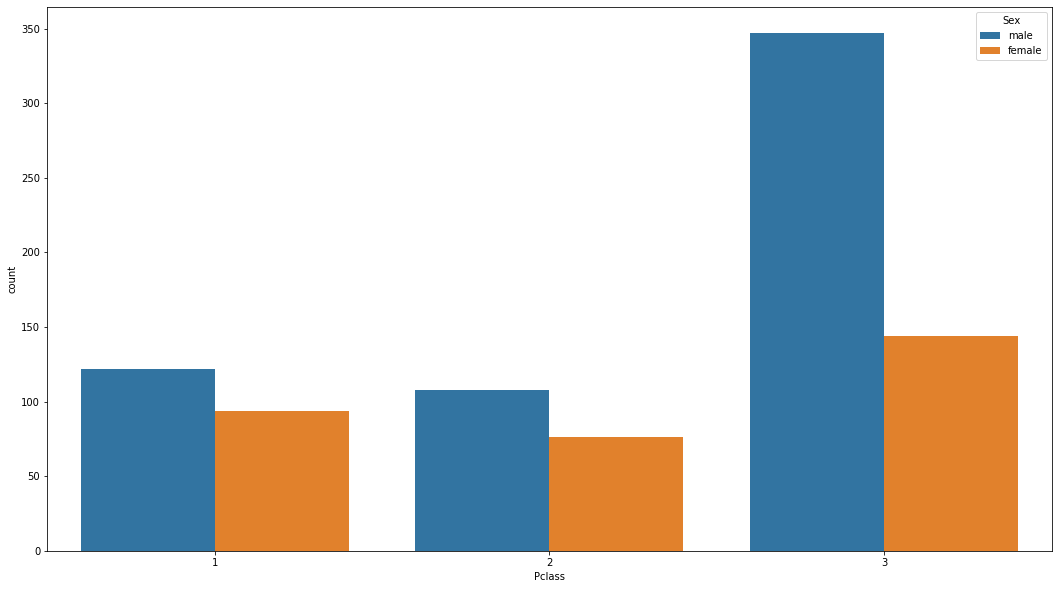

In [10]:
plt.figure(figsize=(18,10))
sns.countplot(x="Pclass",data=titanic,hue='Sex')

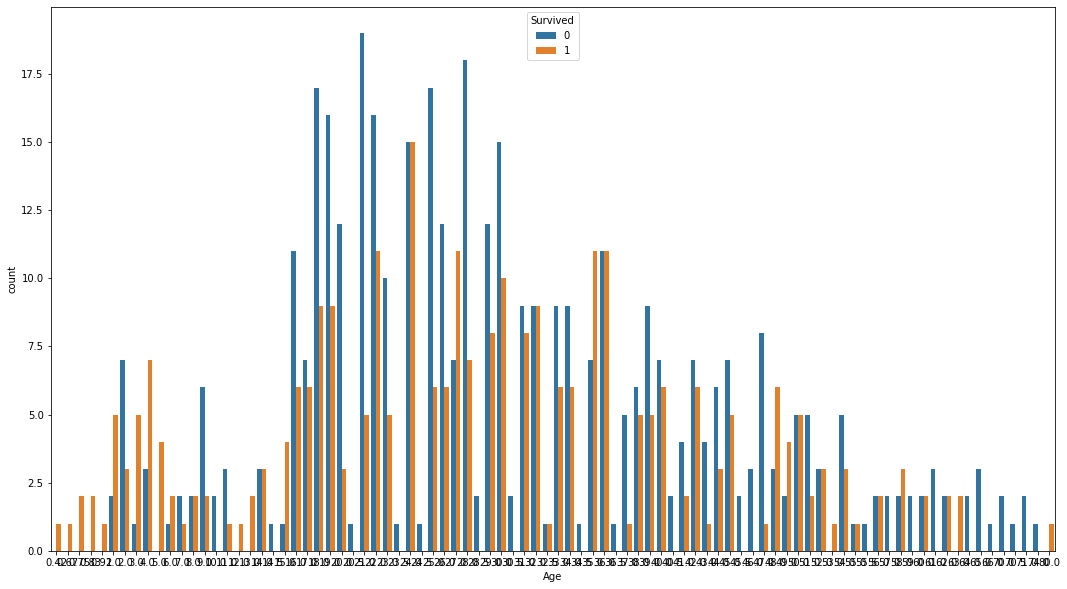

In [11]:
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
plt.figure(figsize=(18,10))
sns.countplot(x="Age",data=titanic,hue='Survived')

In [12]:
#Calculate the average age for survived and drowned passengers separately.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
titanic_survived_age= titanic[['Survived','Age']]
print(titanic_survived_age[titanic_survived_age['Survived']==1].mean())
print(titanic_survived_age[titanic_survived_age['Survived']==0].mean())

Survived     1.00000
Age         28.34369
dtype: float64
Survived     0.000000
Age         30.626179
dtype: float64


In [14]:
#Replace missing age values by the mean age.
print(titanic.isnull())
titanic=titanic.fillna(titanic['Age'].mean())
print(titanic.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

In [15]:
df_titanic=titanic[['Survived','Pclass','Sex']]

#Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female
table=pd.crosstab(df_titanic['Survived'],df_titanic['Pclass'])
print(table)

table1=pd.crosstab(df_titanic['Survived'],df_titanic['Sex'])
print(table1)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [20]:
titanic=pd.read_csv(r'C:\Users\denni\Desktop\data_vault_2021\Classification\train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
titanic=titanic.dropna()
#Bereinigung Cabin
def first_letter(string):
    return string[0]
titanic['CabinSpace'] = titanic['Cabin'].apply(first_letter)
#One hot coding Cabin
titanic['CabinSpace'].unique()
df0=pd.get_dummies(titanic['CabinSpace'])
df0

C:\Users\denni\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,A,B,C,D,E,F,G,T
1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,1,0
11,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
871,0,0,0,1,0,0,0,0
872,0,1,0,0,0,0,0,0
879,0,0,1,0,0,0,0,0
887,0,1,0,0,0,0,0,0


In [22]:
titanic[titanic['Embarked'].isna()]
titanic['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [23]:
#one hot coding
df1=pd.get_dummies(titanic['Embarked'])
df1
df1=df1.transpose()
df2=df1.transpose()
df2

,C,Q,S
1,1,0,0
3,0,0,1
6,0,0,1
10,0,0,1
11,0,0,1
...,...,...,...
871,0,0,1
872,0,0,1
879,1,0,0
887,0,0,1


In [24]:
df_sex=pd.get_dummies(titanic['Sex'])
df_sex

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [25]:
#titanic. merge df2
df3=pd.DataFrame.merge(titanic,df2,left_index=True,right_index=True)
df4=df3.drop(columns='Embarked')
df4=df4.drop(columns='Cabin')
df5=pd.DataFrame.merge(df4,df_sex,left_index=True, right_index=True)
df5=df5.drop(columns='Sex')
df5=df5.drop(columns='Name')
df5=df5.drop(columns='Ticket')
df5=pd.DataFrame.merge(df5,df0,left_index=True, right_index=True)
df5=df5.drop(columns='CabinSpace')
df5

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C_x,Q,S,female,male,A,B,C_y,D,E,F,G,T
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,1,0,0,0,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,1,0,0,0,0,0
6,7,0,1,54.0,0,0,51.8625,0,0,1,0,1,0,0,0,0,1,0,0,0
10,11,1,3,4.0,1,1,16.7000,0,0,1,1,0,0,0,0,0,0,0,1,0
11,12,1,1,58.0,0,0,26.5500,0,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,0,0,1,1,0,0,0,0,1,0,0,0,0
872,873,0,1,33.0,0,0,5.0000,0,0,1,0,1,0,1,0,0,0,0,0,0
879,880,1,1,56.0,0,1,83.1583,1,0,0,1,0,0,0,1,0,0,0,0,0
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,1,0,0,0,0,0,0


In [26]:
#test/train
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df5

X_df5 = df5[['A','B','C_y','D','E','F','G','T']]
y_df5 = df5['Survived']
print(X_df5.shape, y_df5.shape)

X_train, X_test, y_train, y_test = train_test_split(X_df5, y_df5, test_size=0.3, random_state=0)
clf=LogisticRegression(random_state=0)

(183, 8) (183,)


In [27]:
#Build a baseline model
from sklearn.dummy import DummyClassifier
X_df5 #= df5.drop('Survived', axis=1)
y_df5 #= df5['Survived']
#print(X_df5.shape, y_df5.shape)


m_baseline = DummyClassifier(strategy='most_frequent')
m_baseline.fit(X_df5, y_df5)
ypred = m_baseline.predict(X_df5)
ypred
m_baseline.score(X_df5, y_df5)

0.6721311475409836

In [28]:
#training
clf.fit(X_train, y_train)
#predict training
y_pred_train=clf.predict(X_train)
#testing
y_pred_test=clf.predict(X_test)
#testing
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))

(128, 8) (128,) (55, 8) (55,)
0.7454545454545455
0.6484375


In [29]:
#cross validation

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("cross-validation scores", accuracy)

cross-validation scores [0.65384615 0.61538462 0.5        0.64       0.48      ]


In [30]:
#decision tree classifier Step
from sklearn.tree import DecisionTreeClassifier

In [31]:
m_tree = DecisionTreeClassifier()

In [32]:
X_tree = df5[['female','male', 'Pclass', 'SibSp','Parch']]
y_tree = df5['Survived']

In [33]:
m_tree.fit(X_tree, y_tree)

DecisionTreeClassifier()

In [34]:
m_tree.score(X_tree, y_tree)

0.7814207650273224

In [35]:
feature_label = pd.DataFrame(X_tree).columns
feature_importance = m_tree.feature_importances_

print(feature_label, m_tree.feature_importances_)

Index(['female', 'male', 'Pclass', 'SibSp', 'Parch'], dtype='object') [0.         0.68092676 0.12095223 0.10289632 0.09522469]


In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/denni/Anaconda3/Library/bin/graphviz'

In [37]:
from sklearn.tree import export_graphviz
import graphviz

import graphviz
# C:/ProgramData/Anaconda3..
tree = export_graphviz(m_tree, out_file=None,
                class_names=["Dead", "Survived"],
                feature_names=['male','female', 'Passenger Class', 'Siblings & Spouses', 'Parents & Children'],
                impurity=True,
                filled=True)

open('titanic.dot', 'w').write(tree)

5669

In [38]:
graph = graphviz.Source(tree)
graph.render('titanic4')  # creates PDF
#graph  # in Jupyter

'titanic4.pdf'

In [39]:
#Randomized tree task
from sklearn.ensemble import RandomForestClassifier
#1.train /Test Split

x_train,x_test,y_train,y_test = train_test_split(X_tree,y_tree, test_size=0.3, random_state=0)
#2. train the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
#3.Test
y_pred_train=rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print(accuracy_score(y_test,y_pred_test))
print(accuracy_score(y_train,y_pred_train))
rf

0.7636363636363637
0.78125


RandomForestClassifier(random_state=0)

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train, y_train, cv = 5)
scores

array([0.84615385, 0.61538462, 0.65384615, 0.64      , 0.72      ])

Precision Score is 0.7380952380952381
Recall Score is 0.9393939393939394
F1 Score is 0.8266666666666667


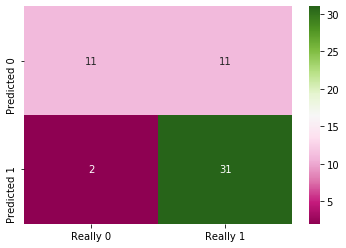

In [41]:
# Random Forest Classifier
# evaluate the classifier by confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred_test, y_test, normalize=None),cmap="PiYG", annot=True, xticklabels=('Really 0','Really 1'),yticklabels=('Predicted 0','Predicted 1'))
#precision
from sklearn.metrics import precision_score
print('Precision Score is '+str(precision_score(y_pred_test, y_test)))
from sklearn.metrics import recall_score
print('Recall Score is '+str(recall_score(y_pred_test, y_test)))
#F1 score
from sklearn.metrics import f1_score
print('F1 Score is '+str(f1_score(y_pred_test, y_test)))

Precision Score is 0.691358024691358
Recall Score is 0.9491525423728814
F1 Score is 0.7999999999999998


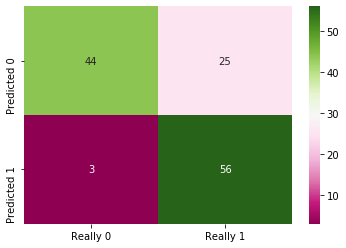

In [42]:
sns.heatmap(confusion_matrix(y_pred_train, y_train, normalize=None),cmap="PiYG", annot=True, xticklabels=('Really 0','Really 1'),yticklabels=('Predicted 0','Predicted 1'))
#precision
from sklearn.metrics import precision_score
print('Precision Score is '+str(precision_score(y_pred_train, y_train)))
#Recall
from sklearn.metrics import recall_score
print('Recall Score is '+str(recall_score(y_pred_train, y_train)))
#F1 score
from sklearn.metrics import f1_score
print('F1 Score is '+str(f1_score(y_pred_train, y_train)))

### experiment with predicting the passengerclass

In [43]:
df5['D'].value_counts()

0    152
1     31
Name: D, dtype: int64

In [44]:
X_df5 = df5[['Survived','Age','male','female','Parch']]
y_df5 = df5['D']
print(X_df5.shape, y_df5.shape)

X_train, X_test, y_train, y_test = train_test_split(X_df5, y_df5, test_size=0.1, random_state=0)
clf=LogisticRegression(random_state=0)

(183, 5) (183,)


In [45]:
#baseline model

m_baseline = DummyClassifier(strategy='most_frequent')
m_baseline.fit(X_train, y_train)
ypred = m_baseline.predict(X_train)
ypred_test=m_baseline.predict(X_test)
ypred
#m_baseline.score(X_df5, y_df5)
accuracy_score(y_train,ypred), accuracy_score(y_test,ypred_test)

(0.8414634146341463, 0.7368421052631579)

In [46]:
# Hyper parameter optimiziation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pprint

In [47]:
# Define Classifier
clf=LogisticRegression()
clf.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [48]:
clf.fit(X_train, y_train)
ypred_=clf.predict(X_train)
accuracy_score(y_train,ypred_)

0.8414634146341463

In [49]:
#define a parameter grid
param_grid = {'C': [10.0,1.0, .1, 0.01, 0.001]}
param_grid

{'C': [10.0, 1.0, 0.1, 0.01, 0.001]}

In [50]:
X_train.shape

(164, 5)

In [51]:
cv = GridSearchCV(clf, param_grid, 
                  return_train_score=True, 
                  scoring='f1', 
                  cv=5, n_jobs=4)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [10.0, 1.0, 0.1, 0.01, 0.001]},
             return_train_score=True, scoring='f1')

In [52]:
#Collect the results
res = pd.DataFrame(cv.cv_results_)
print(res.columns)
pprint.pprint(res)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.114599      0.008308         0.015196        0.001458      10   
1       0.098801      0.020618         0.015600        0.002060       1   
2       0.075402      0.006622         0.017191        0.003127     0.1   
3       0.070006      0.010491         0.017594        0.002653    0.01   
4       0.049593      0.006347         0.015796        0.001728   0.001   

         params  split0_test_score  split1_test_score  split2_test_score  \


In [53]:
display(res[['mean_test_score']])

,mean_test_score
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [54]:
res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')

In [55]:
col_names = [ 'mean_test_score', 'mean_train_score','param_C', 'params']
res.sort_values('mean_test_score',ascending=False)[col_names]

,mean_test_score,mean_train_score,param_C,params
0,0.0,0.0,10,{'C': 10.0}
1,0.0,0.0,1,{'C': 1.0}
2,0.0,0.0,0.1,{'C': 0.1}
3,0.0,0.0,0.01,{'C': 0.01}
4,0.0,0.0,0.001,{'C': 0.001}


In [56]:
#test train
#training
clf.fit(X_train, y_train)
#predict training
y_pred_train=clf.predict(X_train)
#testing
y_pred_test=clf.predict(X_test)
#testing
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))


(164, 5) (164,) (19, 5) (19,)
0.7368421052631579
0.8414634146341463


In [57]:
#measure
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

print(accuracy_score(y_test, y_pred_test))
print(accuracy_score(y_train, y_pred_train))

from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("cross-validation scores", accuracy)

(164, 5) (164,) (19, 5) (19,)
0.7368421052631579
0.8414634146341463
cross-validation scores [0.84848485 0.84848485 0.84848485 0.81818182 0.84375   ]


In [58]:
#decision tree classifier Step
from sklearn.tree import DecisionTreeClassifier
m_tree = DecisionTreeClassifier()


In [59]:
X_tree = df5[['Survived','Age','male','female','Parch']]
y_tree = df5['A']

In [60]:
m_tree.fit(X_tree, y_tree)
m_tree.score(X_tree, y_tree)

0.9726775956284153

In [61]:
feature_label = pd.DataFrame(X_tree).columns
feature_importance = m_tree.feature_importances_

print(feature_label, m_tree.feature_importances_)

Index(['Survived', 'Age', 'male', 'female', 'Parch'], dtype='object') [0.04167115 0.90384873 0.         0.03859442 0.01588569]


In [62]:
#Randomized tree task
from sklearn.ensemble import RandomForestClassifier
#1.train /Test Split

x_train,x_test,y_train,y_test = train_test_split(X_tree,y_tree, test_size=0.3, random_state=0)


In [63]:
#2. train the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
#3.Test
y_pred_train=rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print(accuracy_score(y_test,y_pred_test))
print(accuracy_score(y_train,y_pred_train))
rf

0.9090909090909091
0.9765625


RandomForestClassifier(random_state=0)

In [64]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train, y_train, cv = 5)

In [65]:
scores

array([0.84615385, 0.84615385, 0.88461538, 0.96      , 0.92      ])

Precision Score is 0.3333333333333333
Recall Score is 0.25
F1 Score is 0.28571428571428575


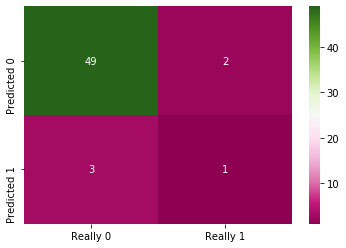

In [66]:
# for every test of a classifier
#evaluate the classifier by confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred_test, y_test, normalize=None),cmap="PiYG", annot=True, xticklabels=('Really 0','Really 1'),yticklabels=('Predicted 0','Predicted 1'))
#precision
from sklearn.metrics import precision_score
print('Precision Score is '+str(precision_score(y_pred_test, y_test)))
#recall
from sklearn.metrics import recall_score
print('Recall Score is '+str(recall_score(y_pred_test, y_test)))
#F1 score
from sklearn.metrics import f1_score
print('F1 Score is '+str(f1_score(y_pred_test, y_test)))

Precision Score is 0.6666666666666666
Recall Score is 1.0
F1 Score is 0.8


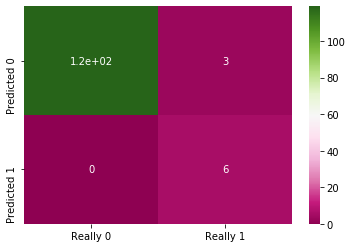

In [67]:
sns.heatmap(confusion_matrix(y_pred_train, y_train, normalize=None),cmap="PiYG", annot=True,xticklabels=('Really 0','Really 1'),yticklabels=('Predicted 0','Predicted 1'))
#precision
from sklearn.metrics import precision_score
print('Precision Score is '+str(precision_score(y_pred_train, y_train)))
#recall
from sklearn.metrics import recall_score
print('Recall Score is '+str(recall_score(y_pred_train, y_train)))
#F1 score
from sklearn.metrics import f1_score
print('F1 Score is '+str(f1_score(y_pred_train, y_train)))